In [1]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import numpy as np
import folium
from geopy.geocoders import Nominatim
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
bridge_csv = pd.read_csv("C:/Users/samka/Downloads/NTAD_National_Bridge_Inventory_-6282134062105639862.csv")
philly_bridges = bridge_csv[(bridge_csv["STATE_CODE_001"] == 42) & (bridge_csv["COUNTY_CODE_003"] == 101) 
                            & (bridge_csv["MAINTENANCE_021"] == 4)]
philly_bridges

,OBJECTID,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,...,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,STATUS,DATE,LATDD,LONGDD,x,y
452996,452997,42,7193,1,3,1,00000,0,6,101,...,42,G,7,237.90,AM,1202,40.103450,-74.961092,-74.961092,40.103450
466573,466574,42,38954,1,3,1,00000,0,6,101,...,42,F,6,631.68,AM,1202,40.017092,-75.211428,-75.211428,40.017092
466579,466580,42,38968,1,3,1,00000,0,6,101,...,42,P,4,2688.70,ST,723,39.963467,-75.186778,-75.186778,39.963467
466580,466581,42,38970,1,3,1,00000,0,6,101,...,42,P,4,439.02,ST,723,39.963861,-75.185025,-75.185025,39.963861
466616,466617,42,39034,1,3,1,00000,0,6,101,...,42,F,5,2384.64,ST,723,40.035356,-75.208878,-75.208878,40.035356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471579,471580,42,000000000054173,1,5,0,00000,3,6,101,...,42,G,7,592.02,ST,723,39.958900,-75.170372,-75.170372,39.958900
471995,471996,42,000000000055933,1,5,0,00000,3,6,101,...,42,G,7,795.60,ST,723,39.959400,-75.173906,-75.173906,39.959400
471997,471998,42,000000000055937,1,5,0,00000,1,6,101,...,42,G,7,838.95,ST,723,39.959500,-75.175500,-75.175500,39.959500
472286,472287,42,000000000057140,1,5,0,00000,2,6,101,...,42,P,3,82.08,ST,723,39.960194,-75.159694,-75.159694,39.960194


In [3]:
philly_bridges = philly_bridges[['OBJECTID', 'LATDD', 'LONGDD', 'YEAR_BUILT_027', 'BRIDGE_CONDITION',
                                 'ADT_029', 'DECK_WIDTH_MT_052', 'STRUCTURE_LEN_MT_049' ]]
philly_bridges

,OBJECTID,LATDD,LONGDD,YEAR_BUILT_027,BRIDGE_CONDITION,ADT_029,DECK_WIDTH_MT_052,STRUCTURE_LEN_MT_049
452996,452997,40.103450,-74.961092,1990,G,9729,13.0,18.3
466573,466574,40.017092,-75.211428,1928,F,14596,19.2,32.9
466579,466580,39.963467,-75.186778,1964,P,27042,16.1,167.0
466580,466581,39.963861,-75.185025,1964,P,27042,16.2,27.1
466616,466617,40.035356,-75.208878,1957,F,28301,20.7,115.2
...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,G,8800,19.8,29.9
471995,471996,39.959400,-75.173906,2018,G,13020,20.4,39.0
471997,471998,39.959500,-75.175500,2018,G,12400,25.5,32.9
472286,472287,39.960194,-75.159694,1892,P,150,4.8,17.1


In [4]:
philly_bridges.rename(columns={"OBJECTID": "Bridge_ID",
                          "LATDD": "Latitude",
                          "LONGDD": "Longitude",
                          "YEAR_BUILT_027": "Year_Built",
                          "BRIDGE_CONDITION": "Bridge_Condition",
                          "ADT_029": "Average Daily_Traffic",
                          "DECK_WIDTH_MT_052": "Deck_Width",
                          "STRUCTURE_LEN_MT_049": "Structure_Length"}, inplace=True)

philly_bridges

,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length
452996,452997,40.103450,-74.961092,1990,G,9729,13.0,18.3
466573,466574,40.017092,-75.211428,1928,F,14596,19.2,32.9
466579,466580,39.963467,-75.186778,1964,P,27042,16.1,167.0
466580,466581,39.963861,-75.185025,1964,P,27042,16.2,27.1
466616,466617,40.035356,-75.208878,1957,F,28301,20.7,115.2
...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,G,8800,19.8,29.9
471995,471996,39.959400,-75.173906,2018,G,13020,20.4,39.0
471997,471998,39.959500,-75.175500,2018,G,12400,25.5,32.9
472286,472287,39.960194,-75.159694,1892,P,150,4.8,17.1


In [5]:
philly_bridges.loc[:, 'SqFt'] = philly_bridges['Deck_Width'] * philly_bridges['Structure_Length']
philly_bridges

,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt
452996,452997,40.103450,-74.961092,1990,G,9729,13.0,18.3,237.90
466573,466574,40.017092,-75.211428,1928,F,14596,19.2,32.9,631.68
466579,466580,39.963467,-75.186778,1964,P,27042,16.1,167.0,2688.70
466580,466581,39.963861,-75.185025,1964,P,27042,16.2,27.1,439.02
466616,466617,40.035356,-75.208878,1957,F,28301,20.7,115.2,2384.64
...,...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,G,8800,19.8,29.9,592.02
471995,471996,39.959400,-75.173906,2018,G,13020,20.4,39.0,795.60
471997,471998,39.959500,-75.175500,2018,G,12400,25.5,32.9,838.95
472286,472287,39.960194,-75.159694,1892,P,150,4.8,17.1,82.08


In [6]:
philly_bridges.loc[:,"Repair_Cost_Est"] = philly_bridges["SqFt"] * 314
philly_bridges

,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt,Repair_Cost_Est
452996,452997,40.103450,-74.961092,1990,G,9729,13.0,18.3,237.90,74700.60
466573,466574,40.017092,-75.211428,1928,F,14596,19.2,32.9,631.68,198347.52
466579,466580,39.963467,-75.186778,1964,P,27042,16.1,167.0,2688.70,844251.80
466580,466581,39.963861,-75.185025,1964,P,27042,16.2,27.1,439.02,137852.28
466616,466617,40.035356,-75.208878,1957,F,28301,20.7,115.2,2384.64,748776.96
...,...,...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,G,8800,19.8,29.9,592.02,185894.28
471995,471996,39.959400,-75.173906,2018,G,13020,20.4,39.0,795.60,249818.40
471997,471998,39.959500,-75.175500,2018,G,12400,25.5,32.9,838.95,263430.30
472286,472287,39.960194,-75.159694,1892,P,150,4.8,17.1,82.08,25773.12


In [7]:
philly_bridges.loc[:,"Replacement_Cost_Est"] = philly_bridges["SqFt"] * 461.76
philly_bridges

,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt,Repair_Cost_Est,Replacement_Cost_Est
452996,452997,40.103450,-74.961092,1990,G,9729,13.0,18.3,237.90,74700.60,1.098527e+05
466573,466574,40.017092,-75.211428,1928,F,14596,19.2,32.9,631.68,198347.52,2.916846e+05
466579,466580,39.963467,-75.186778,1964,P,27042,16.1,167.0,2688.70,844251.80,1.241534e+06
466580,466581,39.963861,-75.185025,1964,P,27042,16.2,27.1,439.02,137852.28,2.027219e+05
466616,466617,40.035356,-75.208878,1957,F,28301,20.7,115.2,2384.64,748776.96,1.101131e+06
...,...,...,...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,G,8800,19.8,29.9,592.02,185894.28,2.733712e+05
471995,471996,39.959400,-75.173906,2018,G,13020,20.4,39.0,795.60,249818.40,3.673763e+05
471997,471998,39.959500,-75.175500,2018,G,12400,25.5,32.9,838.95,263430.30,3.873936e+05
472286,472287,39.960194,-75.159694,1892,P,150,4.8,17.1,82.08,25773.12,3.790126e+04


In [8]:
total_repair_cost_est = philly_bridges["Repair_Cost_Est"].sum()
total_replacement_cost_est = philly_bridges["Replacement_Cost_Est"].sum()
difference = total_replacement_cost_est - total_repair_cost_est
def format_currency(amount):
    return '${:,.2f}'.format(amount)
total_repair_cost_est_formatted = format_currency(total_repair_cost_est)
total_replacement_cost_est_formatted = format_currency(total_replacement_cost_est)
difference_formatted = format_currency(difference)
print('Total Repair Cost Est:', total_repair_cost_est_formatted)
print('Total Replacement Cost Est:', total_replacement_cost_est_formatted)
print('Total Savings By Repairing Versus Replacing:', difference_formatted)

Total Repair Cost Est: $39,524,517.64
Total Replacement Cost Est: $58,123,698.30
Total Savings By Repairing Versus Replacing: $18,599,180.66


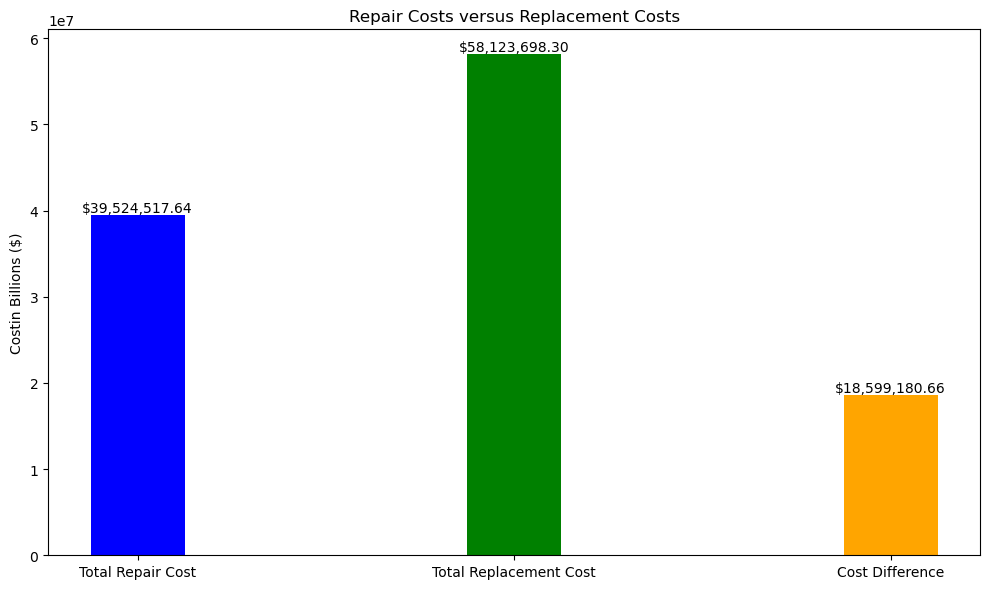

In [9]:
labels = ['Total Repair Cost', 'Total Replacement Cost', 'Cost Difference']
values = [total_repair_cost_est, total_replacement_cost_est, difference]

x_pos = np.arange(len(labels))

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=['blue', 'green', 'orange'], width=0.25)
plt.title('Repair Costs versus Replacement Costs')
plt.ylabel('Costin Billions ($)')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), format_currency(value),
             ha='center', va='bottom', color='black', fontsize=10)
plt.xticks(x_pos, labels, rotation=0)
plt.tight_layout()
plt.show()

In [13]:
def format_currency(amount):
    return '${:,.2f}'.format(amount)
philly_bridges['Repair_Cost_Est'] = philly_bridges['Repair_Cost_Est'].apply(format_currency)
philly_bridges['Replacement_Cost_Est'] = philly_bridges['Replacement_Cost_Est'].apply(format_currency)
philly_bridges

,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt,Repair_Cost_Est,Replacement_Cost_Est
452996,452997,40.103450,-74.961092,1990,G,9729,13.0,18.3,237.90,"$74,700.60","$109,852.70"
466573,466574,40.017092,-75.211428,1928,F,14596,19.2,32.9,631.68,"$198,347.52","$291,684.56"
466579,466580,39.963467,-75.186778,1964,P,27042,16.1,167.0,2688.70,"$844,251.80","$1,241,534.11"
466580,466581,39.963861,-75.185025,1964,P,27042,16.2,27.1,439.02,"$137,852.28","$202,721.88"
466616,466617,40.035356,-75.208878,1957,F,28301,20.7,115.2,2384.64,"$748,776.96","$1,101,131.37"
...,...,...,...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,G,8800,19.8,29.9,592.02,"$185,894.28","$273,371.16"
471995,471996,39.959400,-75.173906,2018,G,13020,20.4,39.0,795.60,"$249,818.40","$367,376.26"
471997,471998,39.959500,-75.175500,2018,G,12400,25.5,32.9,838.95,"$263,430.30","$387,393.55"
472286,472287,39.960194,-75.159694,1892,P,150,4.8,17.1,82.08,"$25,773.12","$37,901.26"


In [14]:
philly_bridges["Bridge_Condition"] = philly_bridges["Bridge_Condition"].replace({'P': 'Poor', 'F': 'Fair', 'G': 'Good'})

philly_bridges


,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt,Repair_Cost_Est,Replacement_Cost_Est
452996,452997,40.103450,-74.961092,1990,Good,9729,13.0,18.3,237.90,"$74,700.60","$109,852.70"
466573,466574,40.017092,-75.211428,1928,Fair,14596,19.2,32.9,631.68,"$198,347.52","$291,684.56"
466579,466580,39.963467,-75.186778,1964,Poor,27042,16.1,167.0,2688.70,"$844,251.80","$1,241,534.11"
466580,466581,39.963861,-75.185025,1964,Poor,27042,16.2,27.1,439.02,"$137,852.28","$202,721.88"
466616,466617,40.035356,-75.208878,1957,Fair,28301,20.7,115.2,2384.64,"$748,776.96","$1,101,131.37"
...,...,...,...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,Good,8800,19.8,29.9,592.02,"$185,894.28","$273,371.16"
471995,471996,39.959400,-75.173906,2018,Good,13020,20.4,39.0,795.60,"$249,818.40","$367,376.26"
471997,471998,39.959500,-75.175500,2018,Good,12400,25.5,32.9,838.95,"$263,430.30","$387,393.55"
472286,472287,39.960194,-75.159694,1892,Poor,150,4.8,17.1,82.08,"$25,773.12","$37,901.26"


In [15]:
geolocator = Nominatim(user_agent="bridge_address")

In [16]:
def reverse_geocode(row):
    location = geolocator.reverse((row["Latitude"], row['Longitude']), exactly_one=True)
    if location:
        return location.address
    else:
        return "N/A"
    
#Add in Address column with reverse geocode data
philly_bridges["Address"] =philly_bridges.apply(reverse_geocode, axis=1)

philly_bridges

,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt,Repair_Cost_Est,Replacement_Cost_Est,Address
452996,452997,40.103450,-74.961092,1990,Good,9729,13.0,18.3,237.90,"$74,700.60","$109,852.70","Dunksferry Road, Mechanicsville, Bensalem Town..."
466573,466574,40.017092,-75.211428,1928,Fair,14596,19.2,32.9,631.68,"$198,347.52","$291,684.56","Ridge Avenue, Wissahickon, Philadelphia, Phila..."
466579,466580,39.963467,-75.186778,1964,Poor,27042,16.1,167.0,2688.70,"$844,251.80","$1,241,534.11","Spring Garden Street, Mantua, Philadelphia, Ph..."
466580,466581,39.963861,-75.185025,1964,Poor,27042,16.2,27.1,439.02,"$137,852.28","$202,721.88","2917, Spring Garden Street, Mantua, Philadelph..."
466616,466617,40.035356,-75.208878,1957,Fair,28301,20.7,115.2,2384.64,"$748,776.96","$1,101,131.37","Henry Avenue, Philadelphia, Philadelphia Count..."
...,...,...,...,...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,Good,8800,19.8,29.9,592.02,"$185,894.28","$273,371.16","North 19th Street, Center City, Philadelphia, ..."
471995,471996,39.959400,-75.173906,2018,Good,13020,20.4,39.0,795.60,"$249,818.40","$367,376.26","Vine Street Expressway, Center City, Philadelp..."
471997,471998,39.959500,-75.175500,2018,Good,12400,25.5,32.9,838.95,"$263,430.30","$387,393.55","North 22nd Street, Center City, Philadelphia, ..."
472286,472287,39.960194,-75.159694,1892,Poor,150,4.8,17.1,82.08,"$25,773.12","$37,901.26","Noble Street, Chinatown, Center City, Philadel..."


In [17]:
words_to_delete = [', Philadelphia', ', Philadelphia County', ', Bucks', ' County', 
                   ', Bensalem Township', ', Pennsylvania', ', United States']

def remove_words(text, words):
    pattern = r'\b(?:{})\b'.format('|'.join(words))
    return re.sub(pattern, '', text)

philly_bridges['Address'] = philly_bridges['Address'].apply(lambda x: remove_words(x, words_to_delete))

philly_bridges

,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt,Repair_Cost_Est,Replacement_Cost_Est,Address
452996,452997,40.103450,-74.961092,1990,Good,9729,13.0,18.3,237.90,"$74,700.60","$109,852.70","Dunksferry Road, Mechanicsville, 19020"
466573,466574,40.017092,-75.211428,1928,Fair,14596,19.2,32.9,631.68,"$198,347.52","$291,684.56","Ridge Avenue, Wissahickon, 19127"
466579,466580,39.963467,-75.186778,1964,Poor,27042,16.1,167.0,2688.70,"$844,251.80","$1,241,534.11","Spring Garden Street, Mantua, 19104"
466580,466581,39.963861,-75.185025,1964,Poor,27042,16.2,27.1,439.02,"$137,852.28","$202,721.88","2917, Spring Garden Street, Mantua, 19104"
466616,466617,40.035356,-75.208878,1957,Fair,28301,20.7,115.2,2384.64,"$748,776.96","$1,101,131.37","Henry Avenue, 19127"
...,...,...,...,...,...,...,...,...,...,...,...,...
471579,471580,39.958900,-75.170372,2017,Good,8800,19.8,29.9,592.02,"$185,894.28","$273,371.16","North 19th Street, Center City, 19132"
471995,471996,39.959400,-75.173906,2018,Good,13020,20.4,39.0,795.60,"$249,818.40","$367,376.26","Vine Street Expressway, Center City, 19103"
471997,471998,39.959500,-75.175500,2018,Good,12400,25.5,32.9,838.95,"$263,430.30","$387,393.55","North 22nd Street, Center City, 19103"
472286,472287,39.960194,-75.159694,1892,Poor,150,4.8,17.1,82.08,"$25,773.12","$37,901.26","Noble Street, Chinatown, Center City, 19123"


In [28]:
philly_bridges.dtypes

Bridge_ID                  int64
Latitude                 float64
Longitude                float64
Year_Built                 int64
Bridge_Condition          object
Average Daily_Traffic      int64
Deck_Width               float64
Structure_Length         float64
SqFt                     float64
Repair_Cost_Est           object
Replacement_Cost_Est      object
Address                   object
dtype: object

In [29]:
philly_bridges.to_csv('Philly_Bridge.csv', index=False)